## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

A. <a href="#item1">Introduction</a>

2. <a href="#item2">Explore Neighborhoods in New York City</a>

3. <a href="#item3">Analyze Each Neighborhood</a>

4. <a href="#item4">Cluster Neighborhoods</a>

5. <a href="#item5">Examine Clusters</a>    
</font>
</div>

## <a id="item1">A. Introduction</a>

<img src="https://www.telegraph.co.uk/content/dam/Travel/2016/june/buchpalaceofparliamentrexfeatures_618647a.jpg?imwidth=1240"></img>

Known for its wide, tree-lined boulevards, glorious Belle Époque buildings and a reputation for the high life (which in the 1900s earned its nickname of "Little Paris"), Bucharest, Romania's largest city and capital, is today a bustling metropolis.

Romanian legend has it that the city of Bucharest was founded on the banks of the Dambovita River by a shepherd named Bucur, whose name literarily means "joy." His flute playing reportedly dazzled the people and his hearty wine from nearby vineyards endeared him to the local traders, who gave his name to the place [see more here](http://romaniatourism.com/bucharest.html).

### A.1 Problem description and background discussion
According to [Wikipedia](https://en.wikipedia.org/wiki/Bucharest) , the historical city centre was listed, In 2016, as 'endangered' by the World Monuments Watch. In 2017, Bucharest was the European city with the highest growth of tourists who stay over night, according to the Mastercard Global Index of Urban Destinations. As for the past two consecutive years, 2018 and 2019, Bucharest ranked as the European destination with the highest potential for development according to the same study.

In a 2016 [Telegraph article](https://www.telegraph.co.uk/travel/destinations/europe/romania/articles/why-your-next-city-break-should-be-bucharest/), among the to visit Bucharest, one cand read :
- So drinking is incredibly cheap :  "The beer prices alone are enough to make you consider leaving London for good. Even in touristy spots, two pints will set you back less than a fiver. And be sure to try out tuică, a traditional spirit made from plums"
- It's packed with hipster coffee spots: "Bucharest is home to an abundance of cultured graduates – and where young professionals go, hipster joints follow. Tasty local roasts and trendy waiters can be found at T-Zero, Origo, Dianei 4 and The Coffe Factory.
<img src="https://www.telegraph.co.uk/content/dam/Travel/2016/june/buchcoffee78048f7a-0afd-4b09-9e77-08bc3c60478c.jpg?imwidth=640"></img>
- There are some fabulous summer parks: "Renting a boat at Cişmigiu Gardens is one of the most popular leisure activities in Bucharest, especially on a hot day. The city is not short on green spaces and Herăstrău Park is also a treat. 
<img src="https://www.telegraph.co.uk/content/dam/Travel/2016/june/buchcismuiE7G5NF.jpg?imwidth=640"></img>.


So in this project we will use Foursquare data in order to identify most common venues in Bucharest today. 

### A.2 Data description

For this problem, we will get the services of Foursquare API to explore the Bucharest data, in terms of neighborhoods. 
First of all, for this project we will use Bucharest neighborhoods (6 Sectors) as scrapped from [Wikipedia](https://fr.wikipedia.org/wiki/Secteurs_de_Bucarest). In order to geaographically situate the neighborhoods, latitudes and longitudes were manually added to the csv file used for the dataframe from [Latitude.to](https://latitude.to).

Then, data will be extracted from Forsquare in order to include the information about the places around each neighborhood like restaurants, hotels, coffee shops, parks, theaters, art galleries,museums and many more. 
We will use machine learning technique, “Clustering” to segment the neighborhoods with similar objects on the basis of each neighborhood data. These objects will be given priority on the basis of foot traffic (activity) in their respective neighborhoods. This will help to locate most common venues in Bucharest but also, will allow to evaluate possible business ideas in tourism area. 

## B. Methodology and Data Preparation

 - Installing and Importing of Libraries
 - Scrapping and Cleaning Bucarest Neighborhood Data by use of pandas
 - Retrieving and Cleaning Bucharest Venues Data with geopy help
 - Exploration of Location Data using 

### B.1 Installing and Importing of Libraries
First of all let's install and import necessary libraries : pandas, numpy, geopy, request, folium and so on...

In [303]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import geopy

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
import matplotlib.pyplot as plt # plotting library

import json # library to handle JSON files
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# backend for rendering plots within the browser
%matplotlib inline 
import matplotlib.cm as cm
import matplotlib.colors as colors

import sklearn.cluster
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

import csv

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


### B.2 Scrapping and Cleaning Bucarest Neighborhood Data
First of all, for this project we scrapped Bucharest neighborhoods (6 Sectors) as scrapped Wikipedia. In order to geographically situate the neighborhoods, latitudes and longitudes were manually added to the csv file used for the dataframe from Latitude.to. Then, we converted obtained data into a pandas dataframe shown below :

In [601]:
df = pd.read_csv('bucarest.csv', sep=';')
df.head(6)

,Neighborhood,Habitants,Surface(km2),Density(/km2),Latitude,Longitude
0,Sector-1,238217,68,3 339,44.49239,26.04877
1,Sector-2,362609,32,10 793,44.45280,26.13389
2,Sector-3,395565,32,11 336,44.42340,26.16860
3,Sector-4,170946,34,8 466,44.37536,26.12185
4,Sector-5,382183,29,9 365,44.38766,26.07161
5,Sector-6,376480,38,9 678,44.43543,26.01711


Let's now use geopy library to get the latitude and longitude values of Bucarest. In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent "explorer", as shown below.

In [441]:
#fetching the coordinates of Bucharest using the geopy library
address = 'Bucarest, Romania'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bucarest are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bucarest are 44.4361414, 26.1027202.


Then we visualize Sectors localisation on Bucarest map with Folium library:

In [564]:
import folium.plugins as plugins
from folium.plugins import HeatMap
map_bucarest = folium.Map(location=[latitude, longitude], zoom_start=11, tiles='openstreetmap')
Sectors = ['Sector-1', 'Sector-2', 'Sector-3', 'Sector-4', 'Sector-5', 'Sector-6']
rainbow = ('#00ff00', '#ff00ff', '#0000ff', '#ffa500', '#ff0000', '#ffff00')

for lat, lon, distr, heat in zip(df['Latitude'], df['Longitude'], df['Neighborhood'], df['Habitants']):
    label = folium.Popup(str(distr), parse_html=True)
    folium.CircleMarker([lat, lon],radius=12, popup=label, color = rainbow[Sectors.index(distr)-1], fill=True, fill_color = rainbow[Sectors.index(distr)-1], fill_opacity=0.3).add_to(map_bucarest)
map_bucarest


## C. Results & Discussion
Let's now obtain Bucharest Venues data from Foursquare website. First we need to define credentials and then we can extract needed data using the API.

In [443]:

#defining the Four_square API credentials
CLIENT_ID = 'CNDJIS2MT5OZCATEL3J33X3AZQI41MVAM0OJIFUFJHGYOPVT' 
CLIENT_SECRET = 'MO3DRHIE0PFAJWQE1AIS3K4VY1SQQVRHL0N1K2YMWXNTCXO4' 
VERSION = '20180605'
LIMIT = 100
radius = 5000

In [444]:
import requests
venues =[]
for name,lat,lng in zip(df['Neighborhood'],df['Latitude'],df['Longitude']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    results = requests.get(url).json()['response']['groups'][0]['items']
    for i in results:
        venues.append([
            name, 
            lat, 
            lng, 
            i['venue']['name'], 
            i['venue']['location']['lat'], 
            i['venue']['location']['lng'],  
            i['venue']['categories'][0]['name']])

The obtained data is then inserted in a dataframe, containing geographical localization and categories, as below:

In [602]:
nearby_venues = pd.DataFrame.from_records(venues)
nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
nearby_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sector-1,44.49239,26.04877,Parcul Bazilescu,44.481900,26.041324,Park
1,Sector-1,44.49239,26.04877,Farmacia M,44.488351,26.050135,Pharmacy
2,Sector-1,44.49239,26.04877,Ground Zero Beer,44.499655,26.068552,Brewery
3,Sector-1,44.49239,26.04877,Stejarii Country Club,44.515902,26.069741,Gym / Fitness Center
4,Sector-1,44.49239,26.04877,Mega Image Concept Store,44.505960,26.080946,Supermarket
5,Sector-1,44.49239,26.04877,Lacul Băneasa,44.496865,26.070336,Lake
6,Sector-1,44.49239,26.04877,18 by the Embassy,44.477370,26.071553,Restaurant
7,Sector-1,44.49239,26.04877,Diplomat Restaurant,44.484538,26.079638,Restaurant
8,Sector-1,44.49239,26.04877,Hard Rock Cafe București,44.475554,26.076278,American Restaurant
9,Sector-1,44.49239,26.04877,Decathlon,44.505962,26.080966,Sporting Goods Shop


In [684]:
print("It worths to note that there are {} different unique venue categories for Bucharest.".format(len(nearby_venues['Venue Category'].unique())))

It worths to note that there are 136 different unique venue categories for Bucharest.


If we extract a Top-10 Venue Category based on this data, one can see that Gym / Fitness Center comes in first place, quite surprinsingly. Combining this observation with the fact that Parks arrive in third position, it seem that having good shape is very important in Bucarest!

Coffee shops occupy second position in Top, in agreement with Telegraph article, mentionning that Bucharest "It's packed with hipster coffee spots". 

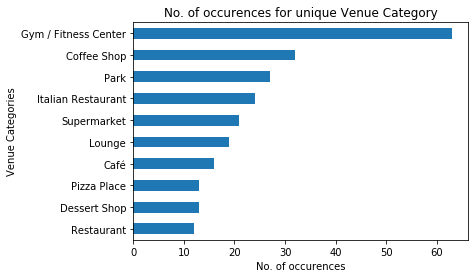

In [628]:
# print(nearby_venues['Venue Category'].unique())
nearby_venues = nearby_venues.replace(to_replace ="Gym", value="Gym / Fitness Center")
nearby_venues['Venue Category'].value_counts()[:10].plot(kind='barh', use_index=True).invert_xaxis
plt.title("No. of occurences for unique Venue Category")
plt.xlabel("No. of occurences")
plt.ylabel("Venue Categories")
plt.gca().invert_yaxis()

Further analysis of this Top-10 indicates "Italian Restaurant" in 4th position and "Pizza Place" in 7th position.  Italian food seems to be appreciated in Bucharest!  
But "Restaurant" item in 9th position indicates that we need further clearing of data: wee need to find and group all restaurants for the data. Let's find all "restaurant occurences in Venue Category and regroup them:


In [685]:
new_df = nearby_venues[nearby_venues['Venue Category'].str.contains("Restaurant")]

Let's put Top-10 Restaurants on a graph and analyze this data.  Once again, one can see that Italian food is highly appreciated in Bucharest, even more than Romanian Cuisine! 
Proximity of Turkey have an impact on number of restaurants. We find also asian cuisine as chinese, sushi, or indian. It is remarkable that we did not found  French Cusine in Top-10 , when we know that Bucharest is called "Little Paris"!

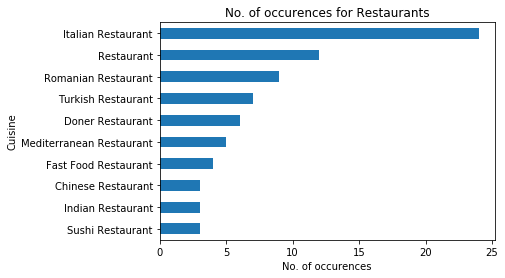

In [630]:
new_df['Venue Category'].value_counts()[:10].plot(kind='barh', use_index=True).invert_xaxis
plt.title("No. of occurences for Restaurants")
plt.xlabel("No. of occurences")
plt.ylabel("Cuisine")
plt.gca().invert_yaxis()

Now lets' take a look again on the Top-10: the new graph shows clearly why Fitness Centers and Parks are in Top-10 Venues, the reason is the Restaurant venue in pole-position!

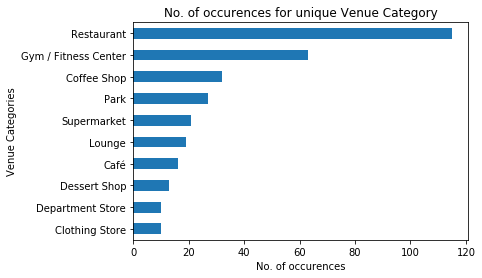

In [647]:
nearby_venues2=nearby_venues.replace(to_replace =["Italian Restaurant", 
                                    "Romanian Restaurant", 
                                    "Indian Restaurant", 
                                    "Chinese Restaurant", 
                                    "Doner Restaurant", 
                                    "Indian Restaurant",
                                    "Mediterranean Restaurant",
                                       "Pizza Place",
                                    "Turkish Restaurant",
                                    "Fast Food Restaurant",
                                      "Thai Restaurant",
                                      "Kebab Restaurant",
                                      "Vietnamese Restaurant",
                                      "American Restaurant",
                                      "Comfort Food Restaurant",
                                      "Sushi Restaurant",
                                      "Scandinavian Restaurant",
                                      "Middle Eastern Restaurant",
                                      "German Restaurant",
                                      "Falafel Restaurant",
                                      "Argentinian Restaurant",
                                      "Asian Restaurant",
                                      "Mexican Restaurant",
                                      "French Restaurant",
                                      "Portuguese Restaurant",
                                      "Lebanese Restaurant",
                                      "Greek Restaurant",
                                      "Japanese Restaurant",
                                      "Modern European Restaurant",
                                      "Seafood Restaurant"
                                        ],  
                            value ="Restaurant") 
nearby_venues2['Venue Category'].value_counts()[:10].plot(kind='barh', use_index=True).invert_xaxis
plt.title("No. of occurences for unique Venue Category")
plt.xlabel("No. of occurences")
plt.ylabel("Venue Categories")
plt.gca().invert_yaxis()

Let's illustrate geographical localizations of these Venues by putting them on Sectors map.

In [632]:
map_venues = folium.Map(location=[latitude, longitude], zoom_start=11, tiles='openstreetmap')
Sectors = ['Sector-1', 'Sector-2', 'Sector-3', 'Sector-4', 'Sector-5', 'Sector-6']
rainbow = ('#00ff00', '#ff00ff', '#0000ff', '#ffa500', '#ff0000', '#ffff00')

for lat, lon, poi, distr in zip(nearby_venues2['Venue Latitude'], nearby_venues2['Venue Longitude'], nearby_venues2['Venue Category'], nearby_venues2['Neighborhood']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker([lat, lon],radius=7, popup=label, color = rainbow[Sectors.index(distr)-1], fill=True, fill_color = rainbow[Sectors.index(distr)-1], fill_opacity=0.3).add_to(map_venues)
#add markers
map_venues


Then we do Onhehot encoding for Venue categories

In [648]:
# using one hot encoding for the different venue categories
venues_onehot = pd.get_dummies(nearby_venues2[['Venue Category']], prefix="", prefix_sep="")

#adding the Neighborhoods column from the nearby_venues dataframe
venues_onehot['Neighborhood'] = nearby_venues2['Neighborhood']

#reordering the venues_onehot dataframe to have Neighborhoods as the first column
list_columns = venues_onehot.columns.tolist()
list_columns.remove('Neighborhood')
new_list=['Neighborhood']
new_list.extend(list_columns)
venues_onehot = venues_onehot[new_list]
venues_onehot.head()


,Neighborhood,Accessories Store,Arcade,Athletics & Sports,Auto Dealership,Auto Workshop,Baby Store,Bakery,Bar,Basketball Court,...,Tea Room,Tennis Court,Tennis Stadium,Theater,Theme Park,Toy / Game Store,Track,Used Bookstore,Wine Bar,Zoo
0,Sector-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sector-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Sector-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sector-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sector-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Neighborhood Analysis

Now, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category and then print the first 5 most frequented categories by neighborhood.

In [649]:
venues_onehot_grouped = venues_onehot.groupby(['Neighborhood']).mean().reset_index()
venues_onehot_grouped.head()
# venues_onehot_grouped.shape

,Neighborhood,Accessories Store,Arcade,Athletics & Sports,Auto Dealership,Auto Workshop,Baby Store,Bakery,Bar,Basketball Court,...,Tea Room,Tennis Court,Tennis Stadium,Theater,Theme Park,Toy / Game Store,Track,Used Bookstore,Wine Bar,Zoo
0,Sector-1,0.00,0.0,0.00,0.00,0.00,0.00,0.02,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,Sector-2,0.00,0.0,0.00,0.00,0.00,0.01,0.01,0.00,0.01,...,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.02,0.0
2,Sector-3,0.00,0.0,0.01,0.00,0.01,0.00,0.03,0.00,0.01,...,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.0
3,Sector-4,0.00,0.0,0.01,0.01,0.00,0.00,0.00,0.00,0.00,...,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.0
4,Sector-5,0.01,0.0,0.01,0.00,0.00,0.00,0.01,0.01,0.00,...,0.03,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.0


In [650]:
#printing top 5 most common venues for each neighbourhood
for ngh in venues_onehot_grouped['Neighborhood']:
#     print("----"+ngh+"----")
    temp = venues_onehot_grouped[venues_onehot_grouped['Neighborhood'] == ngh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(5))
#     print("\n")

                  venue  freq
0            Restaurant  0.22
1  Gym / Fitness Center  0.06
2          Dessert Shop  0.06
3           Coffee Shop  0.06
4                  Park  0.05
                  venue  freq
0            Restaurant  0.16
1           Coffee Shop  0.14
2  Gym / Fitness Center  0.09
3                  Park  0.05
4          Dessert Shop  0.05
                  venue  freq
0            Restaurant  0.24
1  Gym / Fitness Center  0.13
2                  Café  0.07
3                Lounge  0.06
4                  Park  0.05
                  venue  freq
0            Restaurant  0.21
1  Gym / Fitness Center  0.14
2           Supermarket  0.08
3      Department Store  0.05
4                Lounge  0.04
                  venue  freq
0            Restaurant  0.22
1  Gym / Fitness Center  0.12
2           Coffee Shop  0.04
3                  Park  0.04
4          Cocktail Bar  0.03
                  venue  freq
0            Restaurant  0.15
1  Gym / Fitness Center  0.14
2         

We will insert this in a dataframe and take a look to the Top-5 Venues by Neighborhood : 

In [652]:
#function to return num_top_venues most common venues for a neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [653]:
#storing the top 5 venues corresponding to each neighborhood in a datframe
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = venues_onehot_grouped['Neighborhood']

for ind in np.arange(venues_onehot_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_onehot_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Sector-1,Restaurant,Dessert Shop,Gym / Fitness Center,Coffee Shop,Park
1,Sector-2,Restaurant,Coffee Shop,Gym / Fitness Center,Park,Dessert Shop
2,Sector-3,Restaurant,Gym / Fitness Center,Café,Lounge,Park
3,Sector-4,Restaurant,Gym / Fitness Center,Supermarket,Department Store,Lounge
4,Sector-5,Restaurant,Gym / Fitness Center,Park,Coffee Shop,Supermarket
5,Sector-6,Restaurant,Gym / Fitness Center,Coffee Shop,Park,Burger Joint


We can see that Restaurants are most commone venue for each neighborhood. In second place we find Gym center, except for Sector-1 and Sector-2 where a Desert Shop and Coffee Shop, respectively, appears.

### Cluster Neighborhoods
We will use now k-means in order to cluster the neighborhood into 4 clusters.

In [689]:
# set number of clusters
kclusters = 4

#performing K-means clustering on the venues_onehot_grouped dataframe
clustering_data = venues_onehot_grouped.drop('Neighborhood',1)
kmeans = KMeans(n_clusters = kclusters,random_state=0).fit(clustering_data)
kmeans.labels_[0:10]

array([3, 1, 0, 0, 0, 2])

In [690]:
#neighborhoods_venues_sorted.insert(0, 'Labels', kmeans.labels_)
bucharest_merged = nearby_venues2

bucharest_merged = bucharest_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bucharest_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Sector-1,44.49239,26.04877,Parcul Bazilescu,44.481900,26.041324,Park,3,Restaurant,Dessert Shop,Gym / Fitness Center,Coffee Shop,Park
1,Sector-1,44.49239,26.04877,Farmacia M,44.488351,26.050135,Pharmacy,3,Restaurant,Dessert Shop,Gym / Fitness Center,Coffee Shop,Park
2,Sector-1,44.49239,26.04877,Ground Zero Beer,44.499655,26.068552,Brewery,3,Restaurant,Dessert Shop,Gym / Fitness Center,Coffee Shop,Park
3,Sector-1,44.49239,26.04877,Stejarii Country Club,44.515902,26.069741,Gym / Fitness Center,3,Restaurant,Dessert Shop,Gym / Fitness Center,Coffee Shop,Park
4,Sector-1,44.49239,26.04877,Mega Image Concept Store,44.505960,26.080946,Supermarket,3,Restaurant,Dessert Shop,Gym / Fitness Center,Coffee Shop,Park


In [ ]:
Lets visualize this clusterization on the Bucharest map: a lot of venues are situated in the south of Bucharest, in Sector-3 and Sector 5.
    

In [691]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bucharest_merged['Venue Latitude'], bucharest_merged['Venue Longitude'], bucharest_merged['Neighborhood'], bucharest_merged['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

But let's see how the restaurants are distributed over the clusters.

In [678]:
#neighborhoods_venues_sorted.insert(0, 'Labels', kmeans.labels_)
rest_merged = new_df2

rest_merged = rest_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

rest_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
6,Sector-1,44.49239,26.04877,18 by the Embassy,44.477370,26.071553,Restaurant,3,Restaurant,Dessert Shop,Gym / Fitness Center,Coffee Shop,Park
7,Sector-1,44.49239,26.04877,Diplomat Restaurant,44.484538,26.079638,Restaurant,3,Restaurant,Dessert Shop,Gym / Fitness Center,Coffee Shop,Park
8,Sector-1,44.49239,26.04877,Hard Rock Cafe București,44.475554,26.076278,Restaurant,3,Restaurant,Dessert Shop,Gym / Fitness Center,Coffee Shop,Park
12,Sector-1,44.49239,26.04877,Kunnai,44.464912,26.060807,Restaurant,3,Restaurant,Dessert Shop,Gym / Fitness Center,Coffee Shop,Park
29,Sector-1,44.49239,26.04877,Argentine,44.506206,26.088649,Restaurant,3,Restaurant,Dessert Shop,Gym / Fitness Center,Coffee Shop,Park


In [692]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(rest_merged['Venue Latitude'], rest_merged['Venue Longitude'], rest_merged['Neighborhood'], rest_merged['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

We can see here above that center and center-east of Bucharest not very dense in restaurants. Coroborated with previous observation that there's no French restaurant in Top-10 venues (in fact there a only one French restaurant in data we've obtained from Foursquare) we can say that we recommend to open a French cuisine restaurant in that area.